In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

In [12]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [13]:
batch_size = 32
img_height = 224
img_width = 224

train_set = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

valid_set = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_set.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..245.91968].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.44131].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.91069].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [28.753807..254.50261].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.46179].
Clipping input data to the valid ran

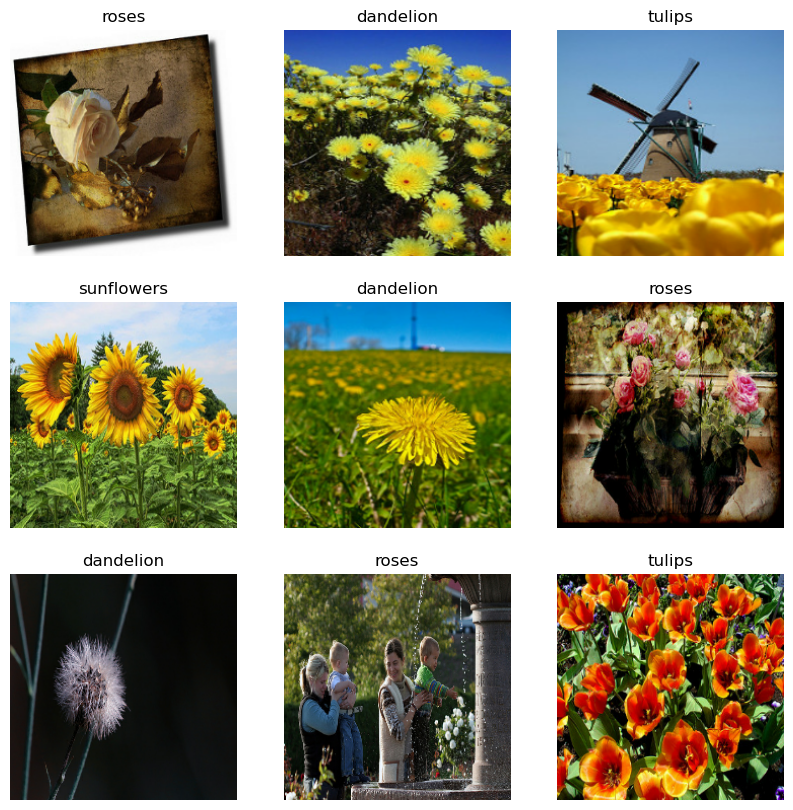

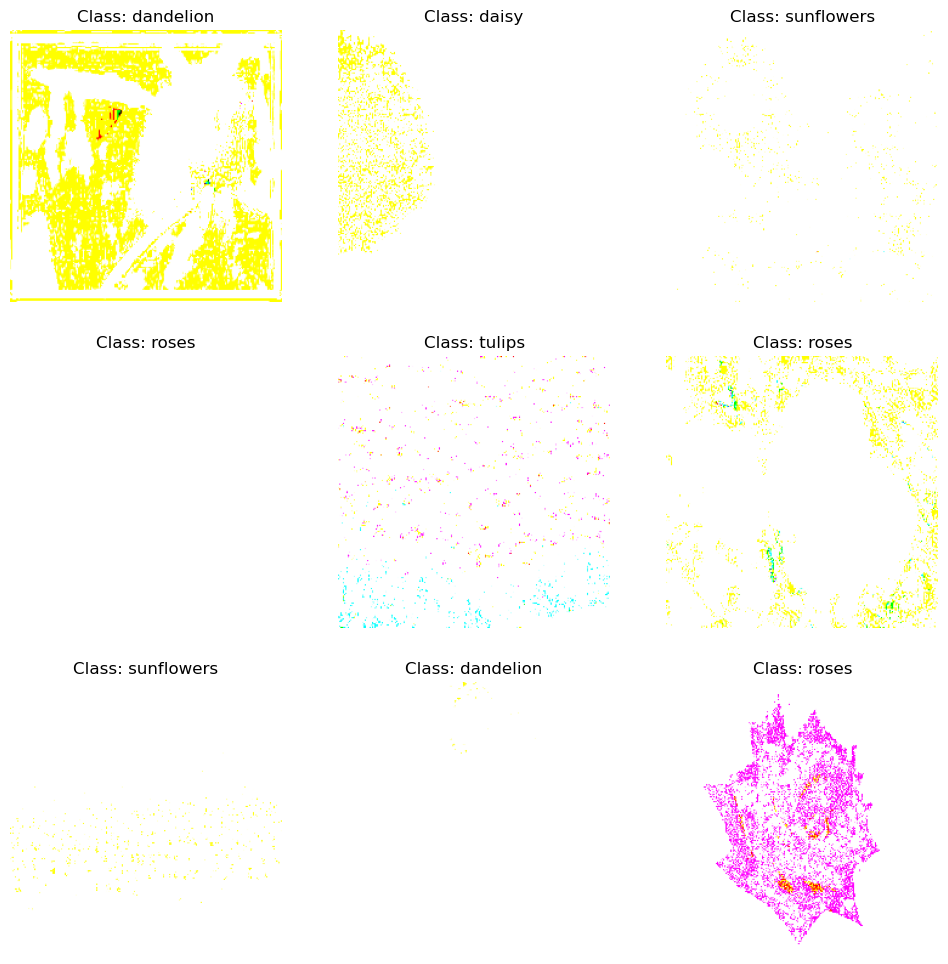

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index])  # rescale to 0–1 for imshow()
        plt.title(f"Class: {class_names[y_batch[index]]}")
        plt.axis("off")

plt.show()

In [15]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(len(class_names), activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)


In [16]:
for layer in base_model.layers:
    layer.trainable = False

In [17]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [18]:

history = model.fit(train_set, validation_data=valid_set, epochs=3)
 

Epoch 1/3


92/92 [==============================] - 15s 93ms/step - loss: 5182.9346 - accuracy: 0.3399 - val_loss: 4796.6357 - val_accuracy: 0.4046
Epoch 2/3
92/92 [==============================] - 8s 84ms/step - loss: 3995.5879 - accuracy: 0.3954 - val_loss: 3650.0947 - val_accuracy: 0.3351
Epoch 3/3
92/92 [==============================] - 8s 85ms/step - loss: 3376.4758 - accuracy: 0.4247 - val_loss: 3595.2637 - val_accuracy: 0.3597


In [19]:
for layer in base_model.layers[56:]:
    layer.trainable = True

In [20]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10


76/92 [=======================>......] - ETA: 2s - loss: 3.6091 - accuracy: 0.2356

KeyboardInterrupt: 

In [25]:
val_pred = model.predict(valid_set)
val_pred = np.argmax(val_pred, axis=1)

 1/23 [>.............................] - ETA: 0s

23/23 [==============================] - 2s 101ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

TypeError: only integer scalar arrays can be converted to a scalar index

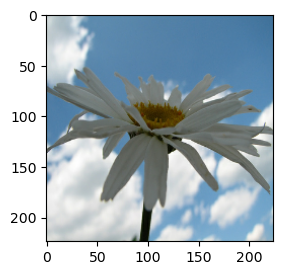

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in valid_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[val_pred[i]])
    plt.axis("off")